## Importing Libraries

In [1]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers.legacy import Adam

## Visualizing Single Audio

In [3]:
random_file_name = "C:/Users/RIHAB-PC/OneDrive - Al Akhawayn University in Ifrane/Global_Music_Genre_Dataset1/Genres/Ahidous/ahidous_0001.wav"

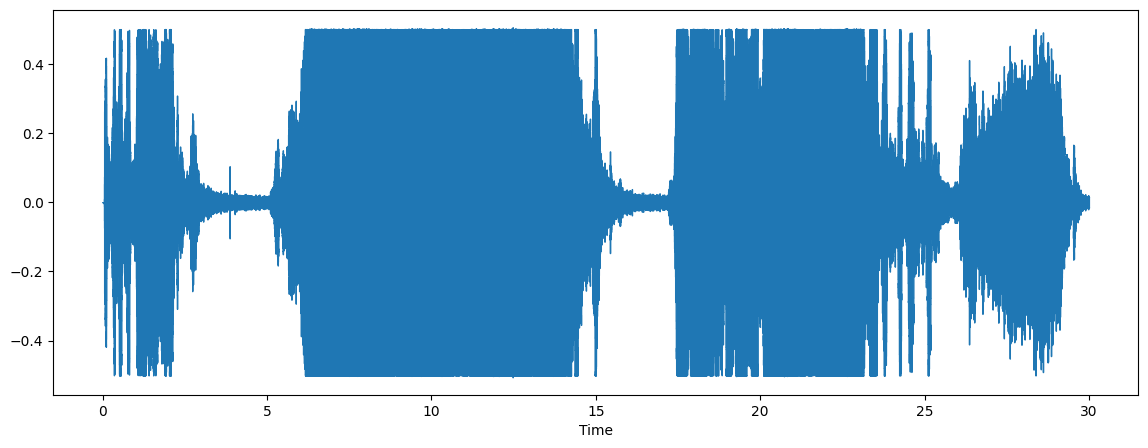

In [18]:
y,sr = librosa.load(random_file_name,sr=44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr=sr)

In [20]:
y.shape

(1323000,)

## Playing Sound

In [23]:
from IPython.display import Audio
Audio(data=y,rate=sr)

In [25]:
y

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
       -6.1035156e-05,  3.3569336e-04,  1.3885498e-03], dtype=float32)

### Doing Visualization on chunks of Audio

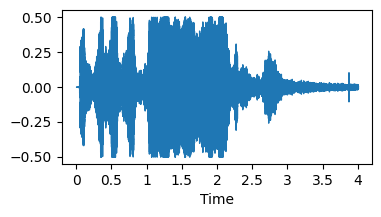

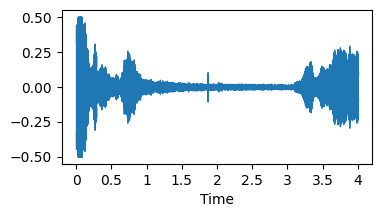

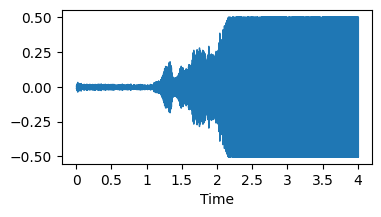

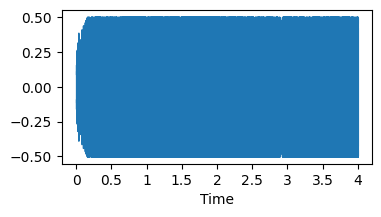

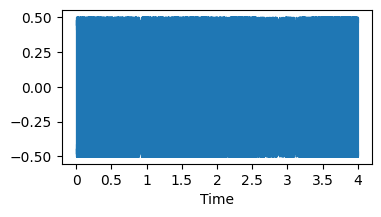

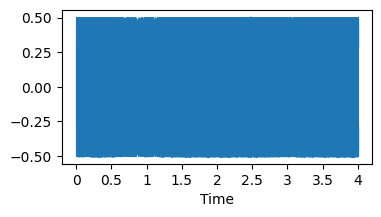

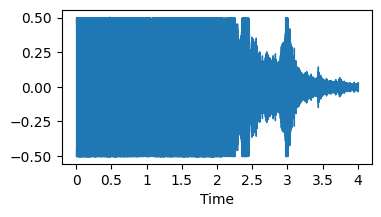

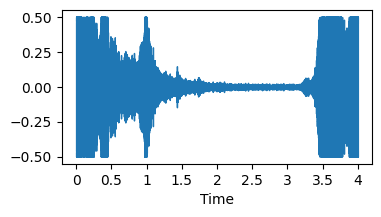

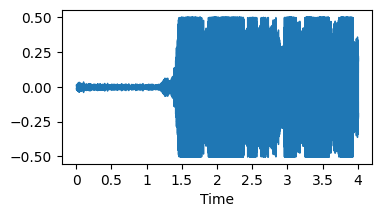

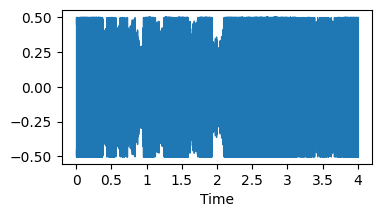

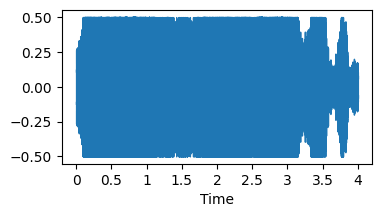

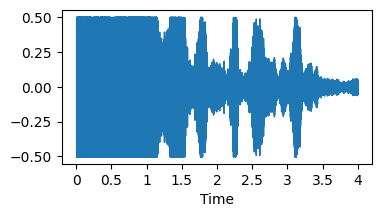

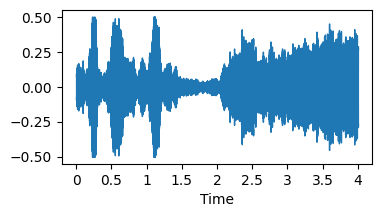

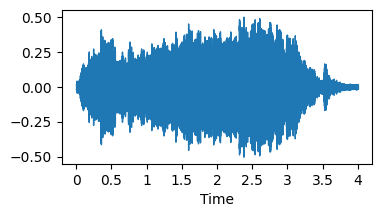

In [28]:
audio_path = "C:/Users/RIHAB-PC/OneDrive - Al Akhawayn University in Ifrane/Global_Music_Genre_Dataset1/Genres/Ahidous/ahidous_0001.wav"
y, sr = librosa.load(audio_path, sr=None)  # sr=None to keep the original sampling rate

# Define the duration of each chunk and overlap
chunk_duration = 4  # seconds
overlap_duration = 2  # seconds

# Convert durations to samples
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

# Calculate the number of chunks
num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

# Iterate over each chunk
for i in range(num_chunks):
    # Calculate start and end indices of the chunk
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples
    
    # Extract the chunk of audio
    chunk = y[start:end]
    plt.figure(figsize=(4, 2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()
    

## Melspectrogram Visualization

In [31]:
#Plotting Melspectrogram of Entire Audio
def plot_melespectrogram(y,sr):
    #Compute spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y,sr=sr)
    #Convert to decibels (log scale)
    spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
    #Visualize the spectrogram
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
    plt.colorbar(format='%2.0f dB')
    plt.title("Spectrogram")
    plt.tight_layout()
    plt.show()
    

In [14]:
random_file_name = "C:/Users/RIHAB-PC/OneDrive - Al Akhawayn University in Ifrane/Global_Music_Genre_Dataset1/Genres/Ahidous/ahidous_0001.wav"
y,sr = librosa.load(random_file_name,sr=44100)

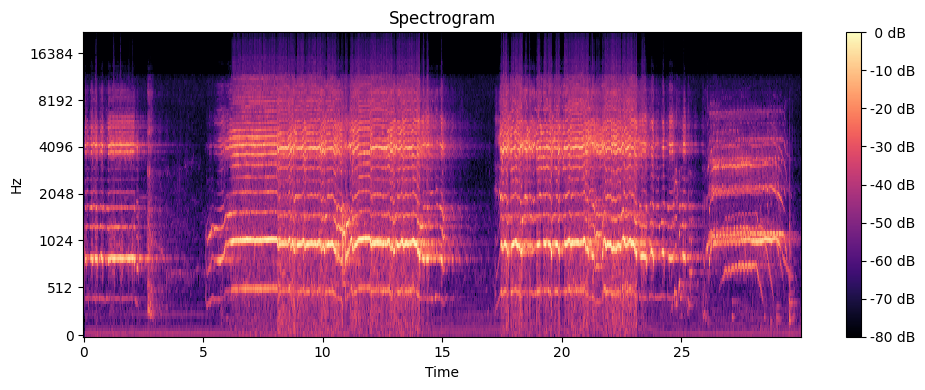

In [15]:
plot_melespectrogram(y,sr)

In [16]:
def plot_melspectrogram_chunks(y,sr):
    #define the duration of each chunk and overlap
    chunk_duration = 4
    overlap_duration = 2
    
    #Convert duration to sample
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr
    
    #Calculate the number of chunks
    num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1
    
    #iterate over each chunks
    for i in range(num_chunks):
        #Calculate start and end indices of the chunk
        start = i*(chunk_samples-overlap_samples)
        end = start+chunk_samples
        #Extract the chunk audio
        chunk = y[start:end]
        #Melspectrogram part
        spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sr)
        print(spectrogram.shape)
        spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
        #Visualize the spectrogram
        plt.figure(figsize=(10,4))
        librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%2.0f dB')
        plt.title("Spectrogram")
        plt.tight_layout()
        plt.show()

In [17]:
random_file_name = "C:/Users/RIHAB-PC/OneDrive - Al Akhawayn University in Ifrane/Global_Music_Genre_Dataset/Genres/Ahidous/ahidous_0001.wav"
y,sr = librosa.load(random_file_name,sr=44100)

(128, 345)


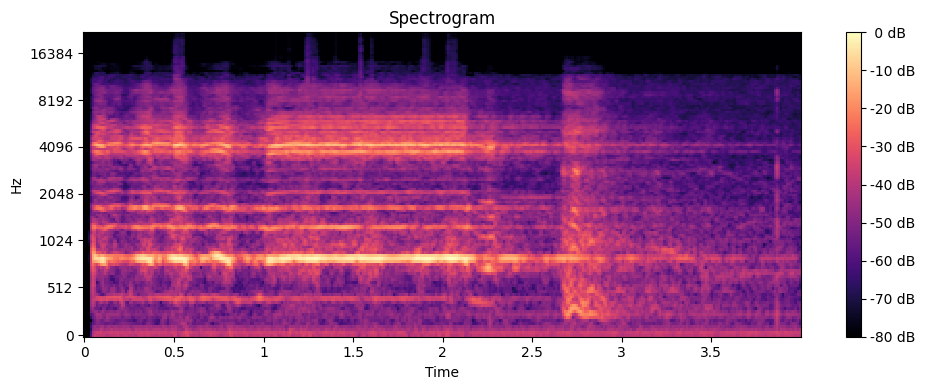

(128, 345)


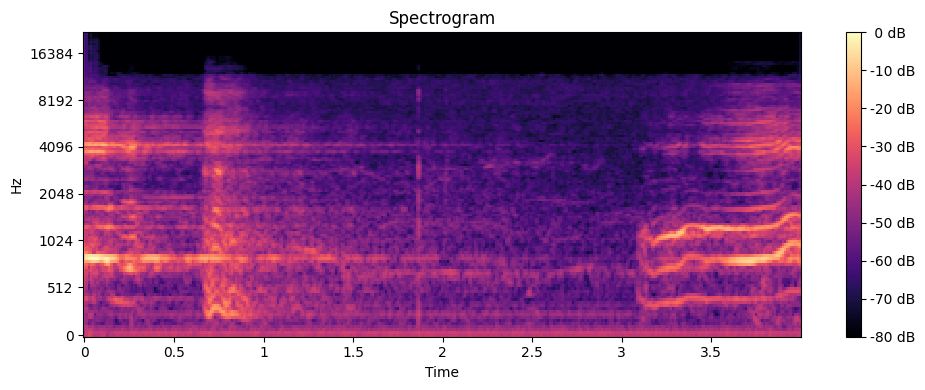

(128, 345)


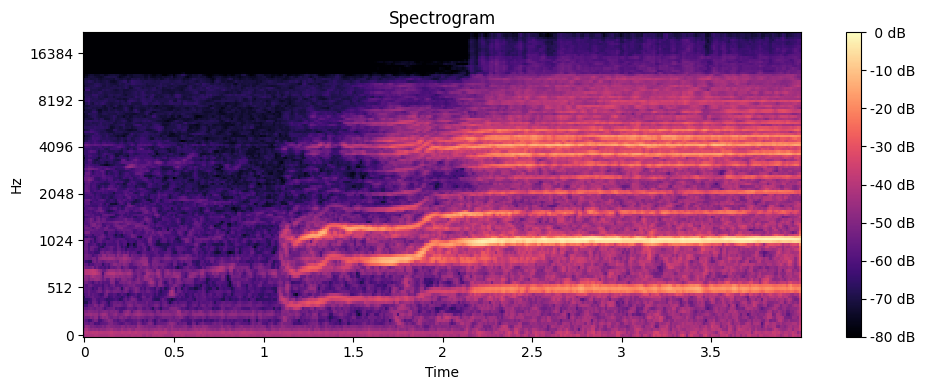

(128, 345)


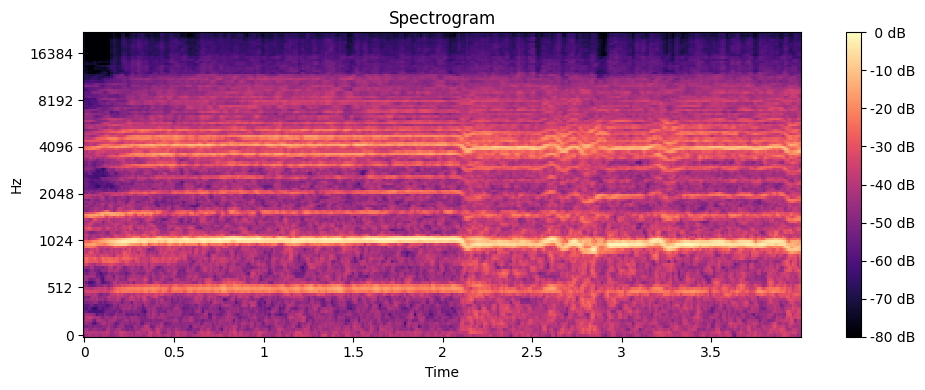

(128, 345)


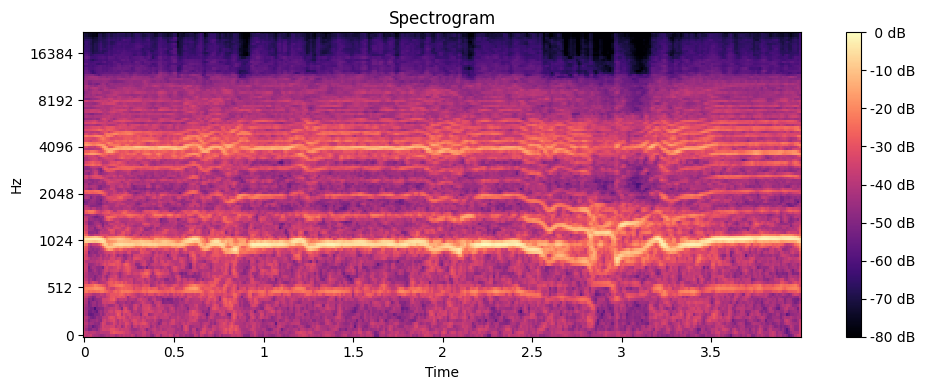

(128, 345)


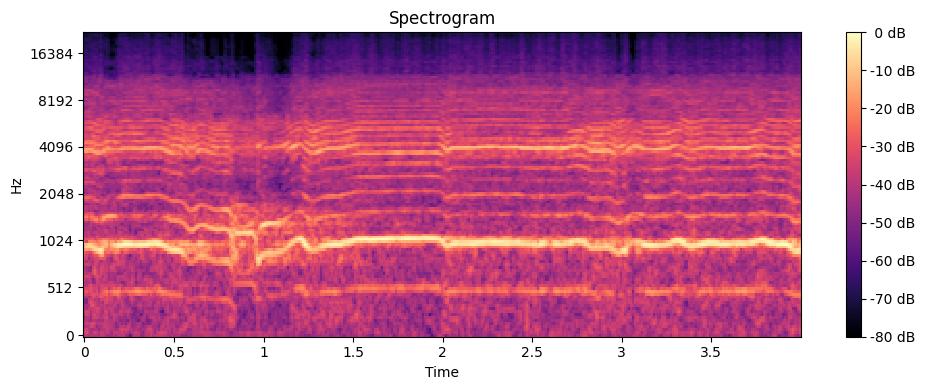

(128, 345)


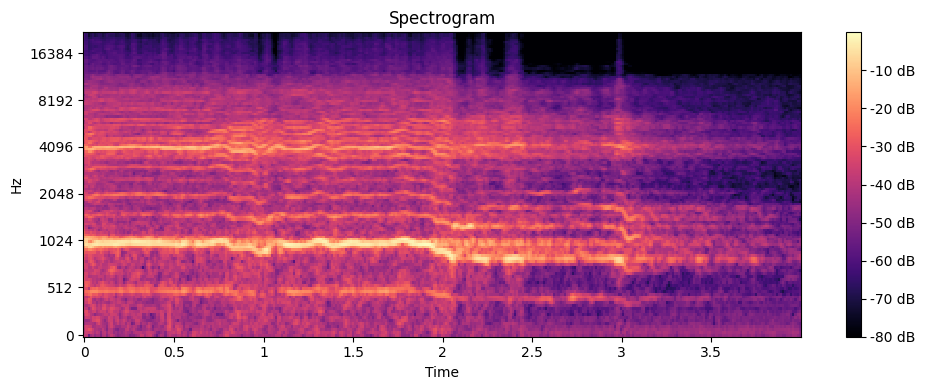

(128, 345)


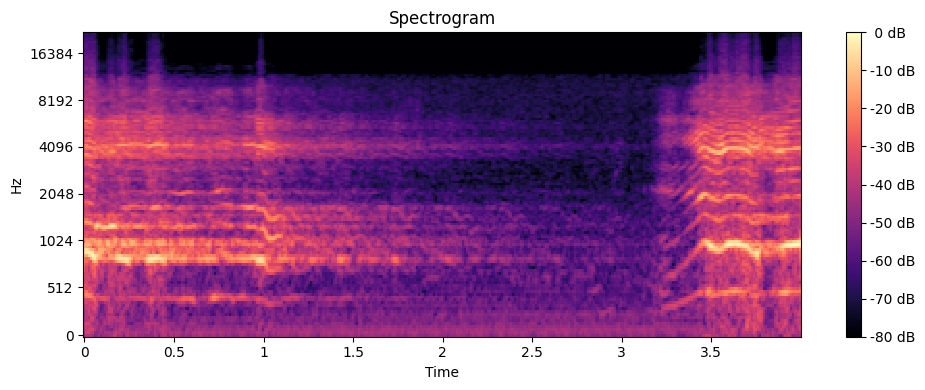

(128, 345)


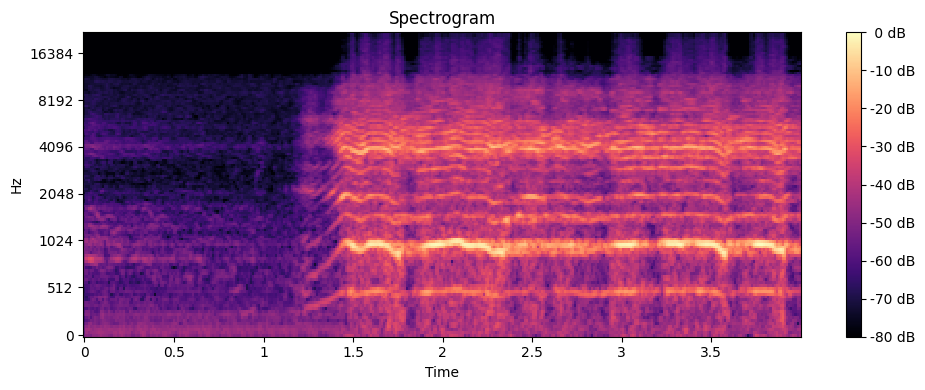

(128, 345)


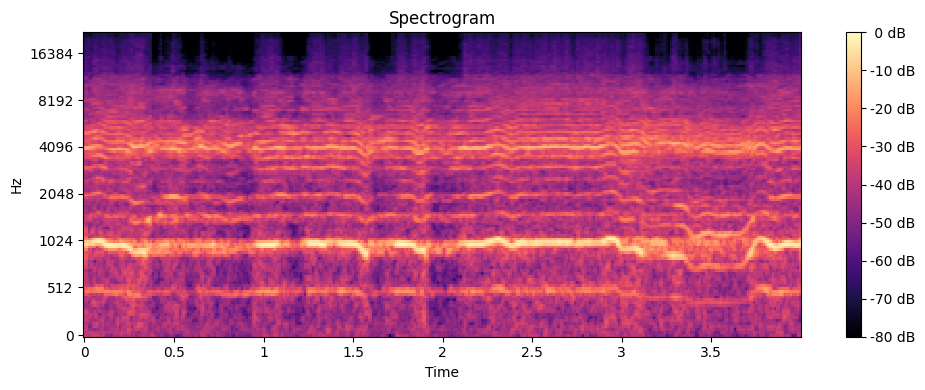

(128, 345)


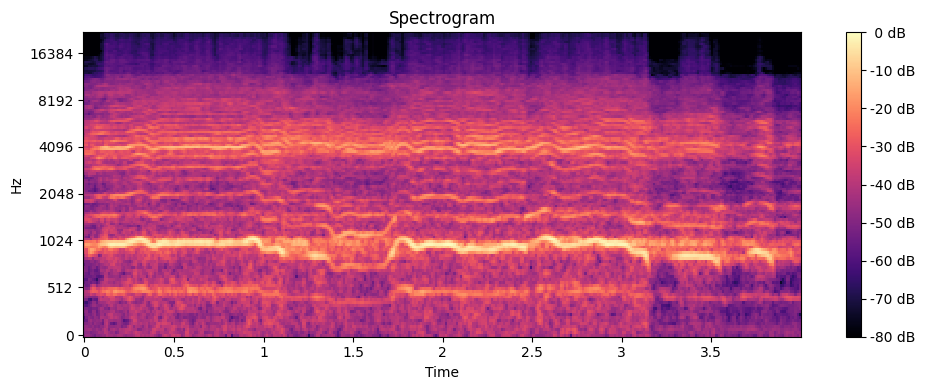

(128, 345)


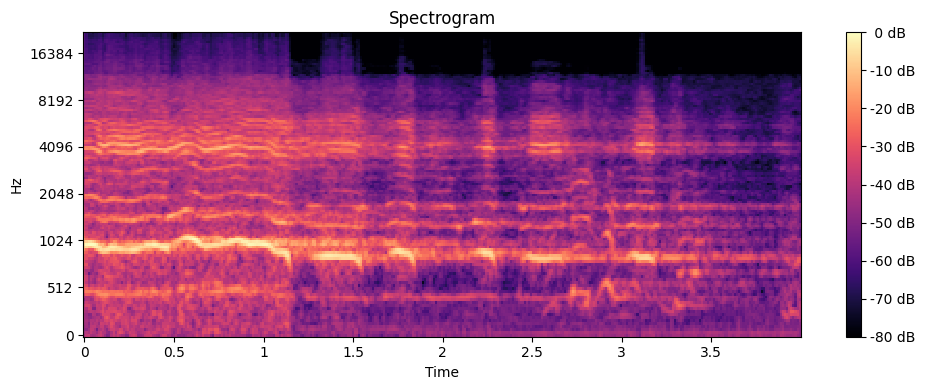

(128, 345)


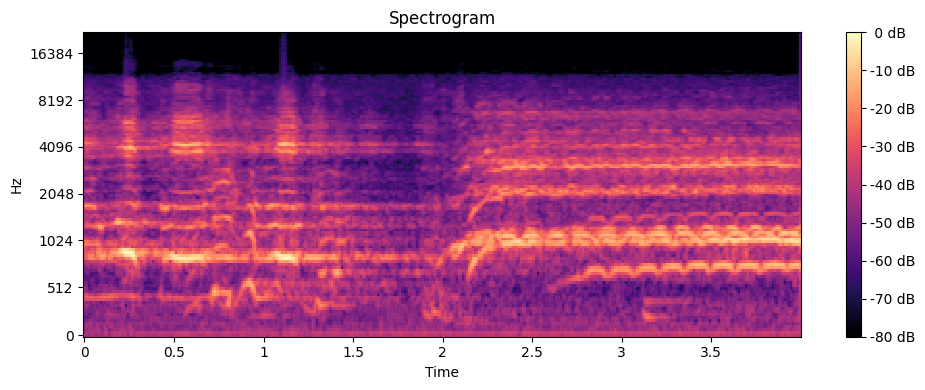

(128, 345)


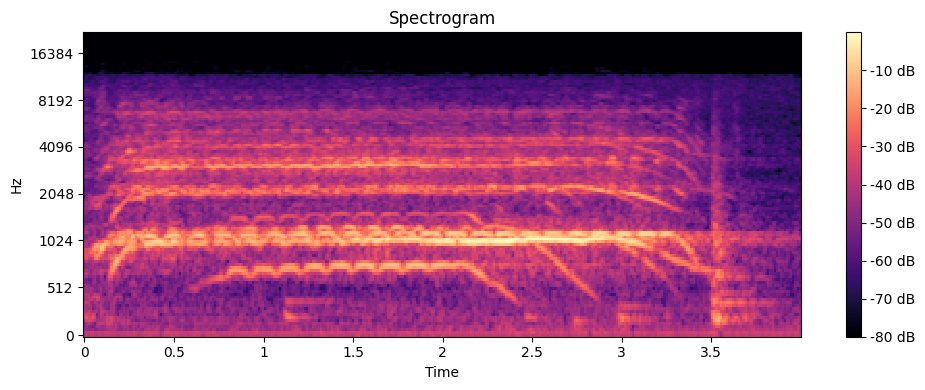

In [19]:
plot_melspectrogram_chunks(y,sr)

In [20]:
128*345

44160

In [21]:
210*210

44100

## Data Preprocessing - Final

In [34]:
#define your folder structure
data_dir = "C:/Users/RIHAB-PC/OneDrive - Al Akhawayn University in Ifrane/Global_Music_Genre_Dataset1/Genres"


In [36]:
import os

def create_genre_list(data_dir):
    # Initialize an empty list to hold all genre names
    classes = []

    # List all directories (genres) in the given data directory
    for class_name in os.listdir(data_dir):
        # Ensure we're only adding directories (representing genres)
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            classes.append(class_name)

    return classes

# Example usage (replace with the path to your actual dataset directory)
data_dir = "C:/Users/RIHAB-PC/OneDrive - Al Akhawayn University in Ifrane/Global_Music_Genre_Dataset1/Genres"  # Adjust this to the correct path
classes = create_genre_list(data_dir)

# Print the list of genres
print(classes)


['Ahidous', 'Aita', 'andalussi', 'AuHaka', 'AwKhaleeji', 'AwPop', 'blues', 'ChPekinopera', 'city pop', 'classical', 'classical tarab', 'country', 'cumbia', 'CuSalsa', 'disco', 'edm', 'hiphop', 'Inbollypop', 'Inghazal', 'Insufi', 'IrBandari', 'issawa', 'jazz', 'jpop', 'kpop', 'MaChaabi', 'MaChgouri', 'MaDakkamarrakchia', 'MaGnawa', 'mariachi', 'merengue', 'metal', 'nrfolk', 'nrsamicjoik', 'pop', 'rai', 'reggae', 'RnB', 'rock', 'samba', 'sertanejo', 'slavic folk', 'tango', 'turkish folk', 'waafrobeats', 'wagriot', 'wahighlife', 'wechanson', 'weflamenco', 'weopera']


In [38]:
# Load and preprocess data
from tensorflow.image import resize

# Update the function to start processing from a specific class (genre)
def load_and_preprocess_data(data_dir, classes, target_shape=(150, 150), start_from=0):
    Data = []
    Labels = []

    # Loop through the classes starting from `start_from` index
    for i_class in range(start_from, len(classes)):
        class_name = classes[i_class]
        class_dir = os.path.join(data_dir, class_name)
        print(f"Processing {class_name}...")

        # Process files in the class folder
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)
                try:
                    audio_data, sample_rate = librosa.load(file_path, sr=None)
                    chunk_duration = 4
                    overlap_duration = 2
                    chunk_samples = chunk_duration * sample_rate
                    overlap_samples = overlap_duration * sample_rate
                    num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
                    
                    for i in range(num_chunks):
                        start = i * (chunk_samples - overlap_samples)
                        end = start + chunk_samples
                        chunk = audio_data[start:end]
                        mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sample_rate)
                        mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
                        Data.append(mel_spectrogram)
                        Labels.append(i_class)

                except Exception as e:
                    print(f"Error processing {file_path}: {e}")
                    continue  # Skip this file and move to the next

    return np.array(Data), np.array(Labels)


# Specify the index of the class to start from (e.g., after processing 'country' genre)
#start_from = 47  # Update this to the next genre index after the last processed genre

#data, labels = load_and_preprocess_data(data_dir, classes, start_from=start_from)


In [40]:
Data,Labels = load_and_preprocess_data(data_dir,classes)

Processing Ahidous...
Processing Aita...
Processing andalussi...
Processing AuHaka...
Processing AwKhaleeji...
Processing AwPop...
Processing blues...
Processing ChPekinopera...
Processing city pop...
Processing classical...
Processing classical tarab...
Processing country...
Processing cumbia...
Processing CuSalsa...
Processing disco...
Processing edm...
Processing hiphop...
Processing Inbollypop...
Processing Inghazal...
Processing Insufi...
Processing IrBandari...
Processing issawa...
Processing jazz...
Processing jpop...
Processing kpop...
Processing MaChaabi...
Processing MaChgouri...
Processing MaDakkamarrakchia...
Processing MaGnawa...
Processing mariachi...
Processing merengue...
Processing metal...
Processing nrfolk...
Processing nrsamicjoik...
Processing pop...
Processing rai...
Processing reggae...
Processing RnB...
Processing rock...
Processing samba...
Processing sertanejo...
Processing slavic folk...
Processing tango...
Processing turkish folk...
Processing waafrobeats...

In [42]:
from sklearn.model_selection import train_test_split
# Splitting dataset train 80% + test 20%
X_train, X_temp, Y_train, Y_temp = train_test_split(Data, Labels, test_size=0.2, random_state=42, shuffle= True)

# Splitting test set into validation 10% + testing 10%
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42, shuffle= True)


In [44]:
import pickle

data = {
    "X_train": X_train,
    "Y_train": Y_train,
    "X_val": X_val,
    "Y_val": Y_val,
    "X_test": X_test,
    "Y_test": Y_test
}

with open("MuGen100_data_50.pkl", "wb") as f:
    pickle.dump(data, f)

print("Preprocessed data saved!")

Preprocessed data saved!


In [37]:
# data,labels = load_and_preprocess_data(data_dir,classes, start_from=28) eabenga

In [38]:
# data,labels = load_and_preprocess_data(data_dir,classes, start_from=76)

In [46]:
Data.shape

(33866, 150, 150, 1)

In [48]:
Labels.shape

(33866,)

In [50]:
from tensorflow.keras.utils import to_categorical
Labels = to_categorical(Labels,num_classes = len(classes)) # Converting labels to one-hot encoding
Labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [52]:
Labels.shape

(33866, 50)

In [92]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes=50)
Y_val = to_categorical(Y_val, num_classes=50)


In [96]:
Y_train.shape

(27092, 50)

In [98]:
Y_val.shape

(3387, 50)

## Splitting of Dataset into Training, Validation and Testing subsets

# Saving pre-processed data

In [ ]:
# # Save the preprocessed data (features and labels) to disk (for backup)
# np.savez_compressed('preprocessed_data.npz', 
#                     X_train=X_train, Y_train=Y_train, 
#                     X_val=X_val, Y_val=Y_val, 
#                     X_test=X_test, Y_test=Y_test)

# print("Preprocessed data saved!")

# Building Model

In [54]:
model = tf.keras.models.Sequential()

In [56]:
X_train[0].shape

(150, 150, 1)

In [58]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [59]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [60]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [61]:
model.add(Dropout(0.3))

In [63]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [68]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [69]:
model.add(Dropout(0.3))

In [70]:
model.add(Flatten())

In [71]:
model.add(Dense(units=1200,activation='relu'))

In [72]:
model.add(Dropout(0.45))

In [73]:
#Output layer
model.add(Dense(units=len(classes),activation='softmax'))

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                   

In [100]:
#Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [104]:
# Define the checkpoint callback
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'model_checkpoint.h5',  # File where model weights will be saved
    monitor='val_loss',  # Can monitor 'val_loss', 'val_accuracy', etc.
    save_best_only=True,  # Save only the best model based on validation loss/accuracy
    save_weights_only=False,  # Save the entire model (including architecture, not just weights)
    mode='min',  # If monitoring 'val_loss', save when it decreases (use 'max' for accuracy)
    verbose=1
)

In [88]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,             # Stop after 5 epochs without improvement
    min_delta=0.001,        # Minimum change to qualify as improvement
    restore_best_weights=True,  # Roll back to best weights
    verbose=1
)

In [106]:
# Training the model with checkpointing
training_history = model.fit(
    X_train, Y_train, 
    epochs=20, 
    batch_size=32,
    validation_data=(X_val, Y_val),
    callbacks=[early_stopping, checkpoint]  # Include the checkpoint callback
)

Epoch 1/20

Epoch 1: val_loss improved from inf to 1.91691, saving model to model_checkpoint.h5
    

C:\Users\RIHAB-PC\anaconda3\envs\myGPU\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


847/847 [==============================] - 5722s 7s/step - loss: 2.4436 - accuracy: 0.3236 - val_loss: 1.9169 - val_accuracy: 0.4467
Epoch 2/20

Epoch 2: val_loss improved from 1.91691 to 1.41956, saving model to model_checkpoint.h5
847/847 [==============================] - 5586s 7s/step - loss: 1.8251 - accuracy: 0.4703 - val_loss: 1.4196 - val_accuracy: 0.5766
Epoch 3/20

Epoch 3: val_loss improved from 1.41956 to 1.24645, saving model to model_checkpoint.h5
847/847 [==============================] - 5601s 7s/step - loss: 1.4744 - accuracy: 0.5673 - val_loss: 1.2465 - val_accuracy: 0.6371
Epoch 4/20

Epoch 4: val_loss improved from 1.24645 to 1.02983, saving model to model_checkpoint.h5
847/847 [==============================] - 5588s 7s/step - loss: 1.2257 - accuracy: 0.6365 - val_loss: 1.0298 - val_accuracy: 0.7021
Epoch 5/20

Epoch 5: val_loss improved from 1.02983 to 0.88145, saving model to model_checkpoint.h5
847/847 [==============================] - 5753s 7s/step - loss: 1.0

In [ ]:
#Training Model
#training_history = model.fit(X_train,Y_train,epochs=30,batch_size=32,validation_data=(X_val,Y_val))

In [108]:
#Recording Training History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [110]:
model.save("Best_Trained_model_on_MuGen.h5") 

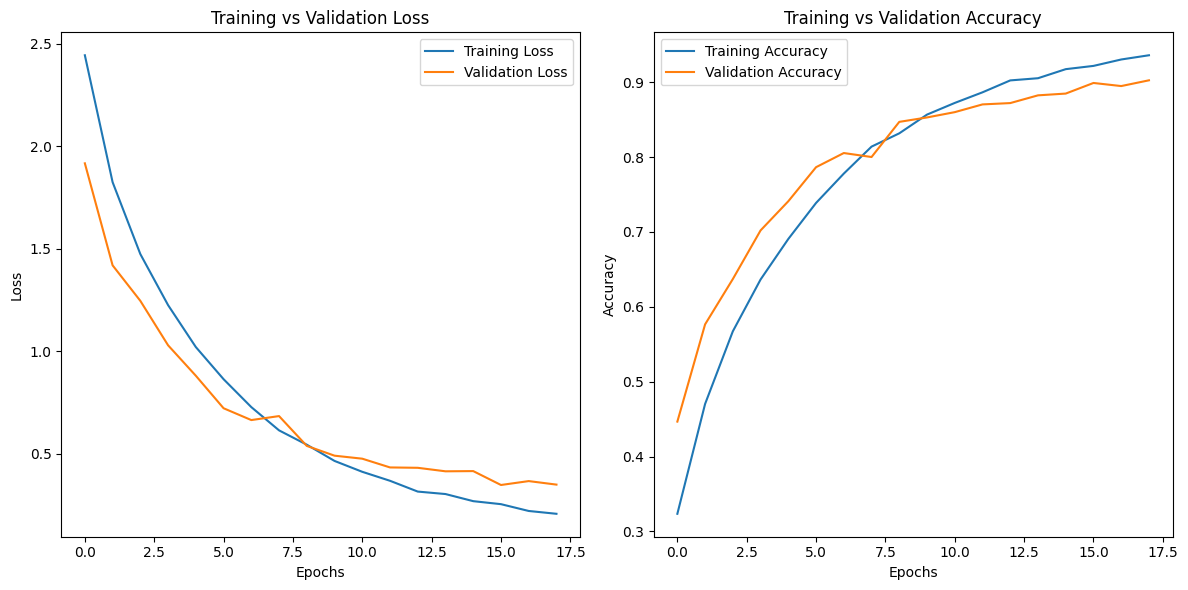

In [112]:
import matplotlib.pyplot as plt

# 'history' is the object returned by model.fit()
# It contains the training/validation metrics during the training process

# Plot training & validation loss
plt.figure(figsize=(12, 6))

# Plot the loss values
plt.subplot(1, 2, 1)
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy values
plt.subplot(1, 2, 2)
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


## Taking over last checkpoints and continuing training (IF computer crashout)

In [ ]:
from tensorflow.keras.models import load_model

# Something happened and we lost all progress, hopefully we saved checkpoints so we hope this is gonna work
# Load the model from the last checkpoint
try:
    model = load_model('model_checkpoint.keras')  # Path to your saved checkpoint file
    print("Model loaded from checkpoint!")
except:
    print("No checkpoint found, starting fresh!")

# Continue training the model from the checkpoint
history = model.fit(
    X_train, Y_train, 
    epochs=4, 
    batch_size=32,
    validation_data=(X_val, Y_val),
    callbacks=[checkpoint] 
)

In [21]:
X_train

array([[[[3.62469602e+00],
         [1.06304932e+00],
         [5.78081071e-01],
         ...,
         [7.72284317e+01],
         [4.75934067e+01],
         [1.37238359e+01]],

        [[6.16288261e+01],
         [1.11565666e+02],
         [1.24939728e+02],
         ...,
         [2.26902710e+02],
         [1.67433502e+02],
         [9.14233856e+01]],

        [[9.65764847e+01],
         [1.58142334e+02],
         [1.55722260e+02],
         ...,
         [2.27748688e+02],
         [3.04347015e+02],
         [1.79836197e+02]],

        ...,

        [[5.75669517e-04],
         [1.67717793e-04],
         [4.96678513e-05],
         ...,
         [8.38105916e-05],
         [8.60303917e-05],
         [1.59282630e-04]],

        [[5.21527836e-04],
         [1.09017732e-04],
         [2.23153370e-06],
         ...,
         [8.25764164e-06],
         [1.78673235e-05],
         [1.52539389e-04]],

        [[5.25240088e-04],
         [1.06741449e-04],
         [1.71574825e-07],
         ...,
 

# Reloading Model

In [125]:
#Reloading model variable
model = tf.keras.models.load_model("Best_Trained_model_on_MuGen.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                   

In [127]:
#Reloading Training history
import json
with open("training_hist.json",'r') as json_file:
    training_history_data = json.load(json_file)

In [129]:
training_history_data.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Model Evaluation - I

In [140]:
#Model evaluation on Training set
train_loss,train_accuracy = model.evaluate(X_train,Y_train)

847/847 [==============================] - 1537s 2s/step - loss: 0.0988 - accuracy: 0.9725


In [143]:
train_loss,train_accuracy

(0.09884677082300186, 0.9725379943847656)

In [146]:
#Model evaluation on Validation set
val_loss,val_accuracy = model.evaluate(X_val,Y_val)

106/106 [==============================] - 191s 2s/step - loss: 0.3488 - accuracy: 0.8990


In [148]:
val_loss,val_accuracy

(0.3488406836986542, 0.8990256786346436)

In [154]:
training_history_data['val_loss']

[1.9169068336486816,
 1.4195581674575806,
 1.246452808380127,
 1.029828429222107,
 0.8814510703086853,
 0.7229852080345154,
 0.6653248071670532,
 0.6847532391548157,
 0.5393611192703247,
 0.4917260706424713,
 0.47705140709877014,
 0.4344189763069153,
 0.432616263628006,
 0.4155363142490387,
 0.4165482819080353,
 0.3488406836986542,
 0.3678564131259918,
 0.35068079829216003]

## Accuracy and Loss Visualization

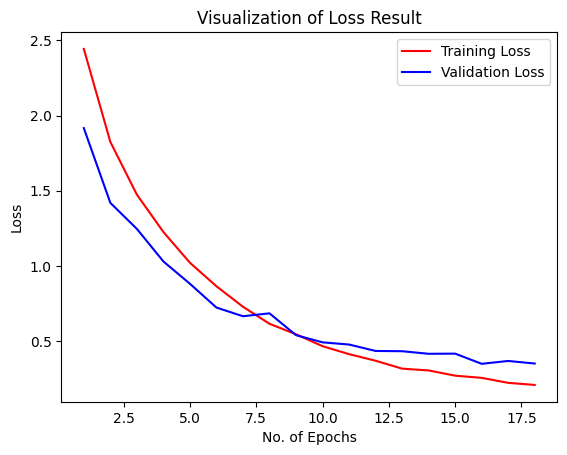

In [158]:
#Visualization of Loss
epochs = [i for i in range(1, len(training_history_data['loss']) + 1)]
plt.plot(epochs,training_history_data['loss'],label="Training Loss",color='red')
plt.plot(epochs,training_history_data['val_loss'],label="Validation Loss",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

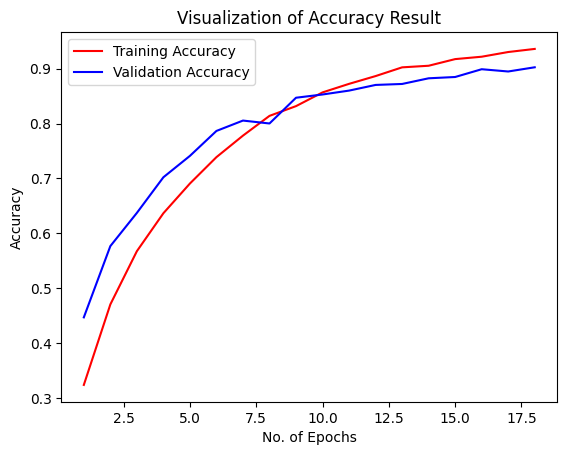

In [160]:
#Visualization of Accuracy
epochs = [i for i in range(1, len(training_history_data['loss']) + 1)]
plt.plot(epochs,training_history_data['accuracy'],label="Training Accuracy",color='red')
plt.plot(epochs,training_history_data['val_accuracy'],label="Validation Accuracy",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Precision,Recall,Confusion Matrix - Model Evaluation-II

In [162]:
X_test.shape

(3387, 150, 150, 1)

In [164]:
y_pred = model.predict(X_test)
y_pred

106/106 [==============================] - 192s 2s/step


array([[1.09931954e-13, 4.38170237e-20, 6.79932329e-25, ...,
        7.05202964e-23, 9.71054806e-22, 5.04445310e-24],
       [2.69844627e-08, 1.37736951e-08, 3.36722272e-09, ...,
        1.86172016e-07, 6.43342624e-09, 5.66340796e-09],
       [1.71253760e-07, 3.66064478e-06, 2.54040810e-06, ...,
        1.73767637e-06, 2.11527549e-06, 4.01273064e-05],
       ...,
       [3.71378270e-08, 5.97550127e-07, 7.36908801e-09, ...,
        6.02750134e-08, 2.09683311e-08, 4.13143786e-09],
       [4.25744016e-04, 1.35620905e-03, 2.14371117e-04, ...,
        4.87127192e-02, 3.75743228e-04, 1.17305096e-03],
       [2.68227362e-13, 4.41286547e-14, 1.64252123e-20, ...,
        1.17218343e-20, 1.09982265e-17, 1.80871018e-21]], dtype=float32)

In [165]:
y_pred.shape

(3387, 50)

In [166]:
predicted_categories = np.argmax(y_pred,axis=1)
predicted_categories

array([27, 11,  9, ..., 22, 10, 27], dtype=int64)

In [167]:
Y_test

array([27, 11,  9, ..., 22, 10, 27])

In [168]:
Y_test.shape

(3387,)

In [173]:
true_categories = Y_test
true_categories

array([27, 11,  9, ..., 22, 10, 27])

In [175]:
classes

['Ahidous',
 'Aita',
 'andalussi',
 'AuHaka',
 'AwKhaleeji',
 'AwPop',
 'blues',
 'ChPekinopera',
 'city pop',
 'classical',
 'classical tarab',
 'country',
 'cumbia',
 'CuSalsa',
 'disco',
 'edm',
 'hiphop',
 'Inbollypop',
 'Inghazal',
 'Insufi',
 'IrBandari',
 'issawa',
 'jazz',
 'jpop',
 'kpop',
 'MaChaabi',
 'MaChgouri',
 'MaDakkamarrakchia',
 'MaGnawa',
 'mariachi',
 'merengue',
 'metal',
 'nrfolk',
 'nrsamicjoik',
 'pop',
 'rai',
 'reggae',
 'RnB',
 'rock',
 'samba',
 'sertanejo',
 'slavic folk',
 'tango',
 'turkish folk',
 'waafrobeats',
 'wagriot',
 'wahighlife',
 'wechanson',
 'weflamenco',
 'weopera']

In [183]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

cm = confusion_matrix(true_categories, predicted_categories)

print(classification_report(
    true_categories,
    predicted_categories,
    labels=np.arange(len(classes)),  # [0, 1, 2, ..., 49]
    target_names=classes
))


                   precision    recall  f1-score   support

          Ahidous       0.97      0.95      0.96        62
             Aita       0.96      0.93      0.95        76
        andalussi       0.94      0.97      0.95        63
           AuHaka       0.93      0.97      0.95        73
       AwKhaleeji       0.99      0.82      0.89        82
            AwPop       0.85      0.89      0.87        72
            blues       0.93      0.93      0.93        72
     ChPekinopera       0.96      0.92      0.94        75
         city pop       0.89      0.95      0.92        59
        classical       0.80      0.97      0.88        79
  classical tarab       0.95      0.79      0.86        66
          country       0.90      0.85      0.88        96
           cumbia       0.95      0.83      0.88        63
          CuSalsa       0.78      0.94      0.86        69
            disco       0.89      0.93      0.91        75
              edm       0.80      0.85      0.82       

C:\Users\RIHAB-PC\anaconda3\envs\myGPU\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RIHAB-PC\anaconda3\envs\myGPU\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RIHAB-PC\anaconda3\envs\myGPU\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

## Confusion Matrix Visualization

In [185]:
cm

array([[59,  0,  0, ...,  0,  0,  0],
       [ 0, 71,  0, ...,  0,  0,  0],
       [ 0,  0, 61, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 45,  0,  2],
       [ 0,  0,  0, ...,  0, 66,  0],
       [ 0,  0,  0, ...,  0,  0, 60]], dtype=int64)

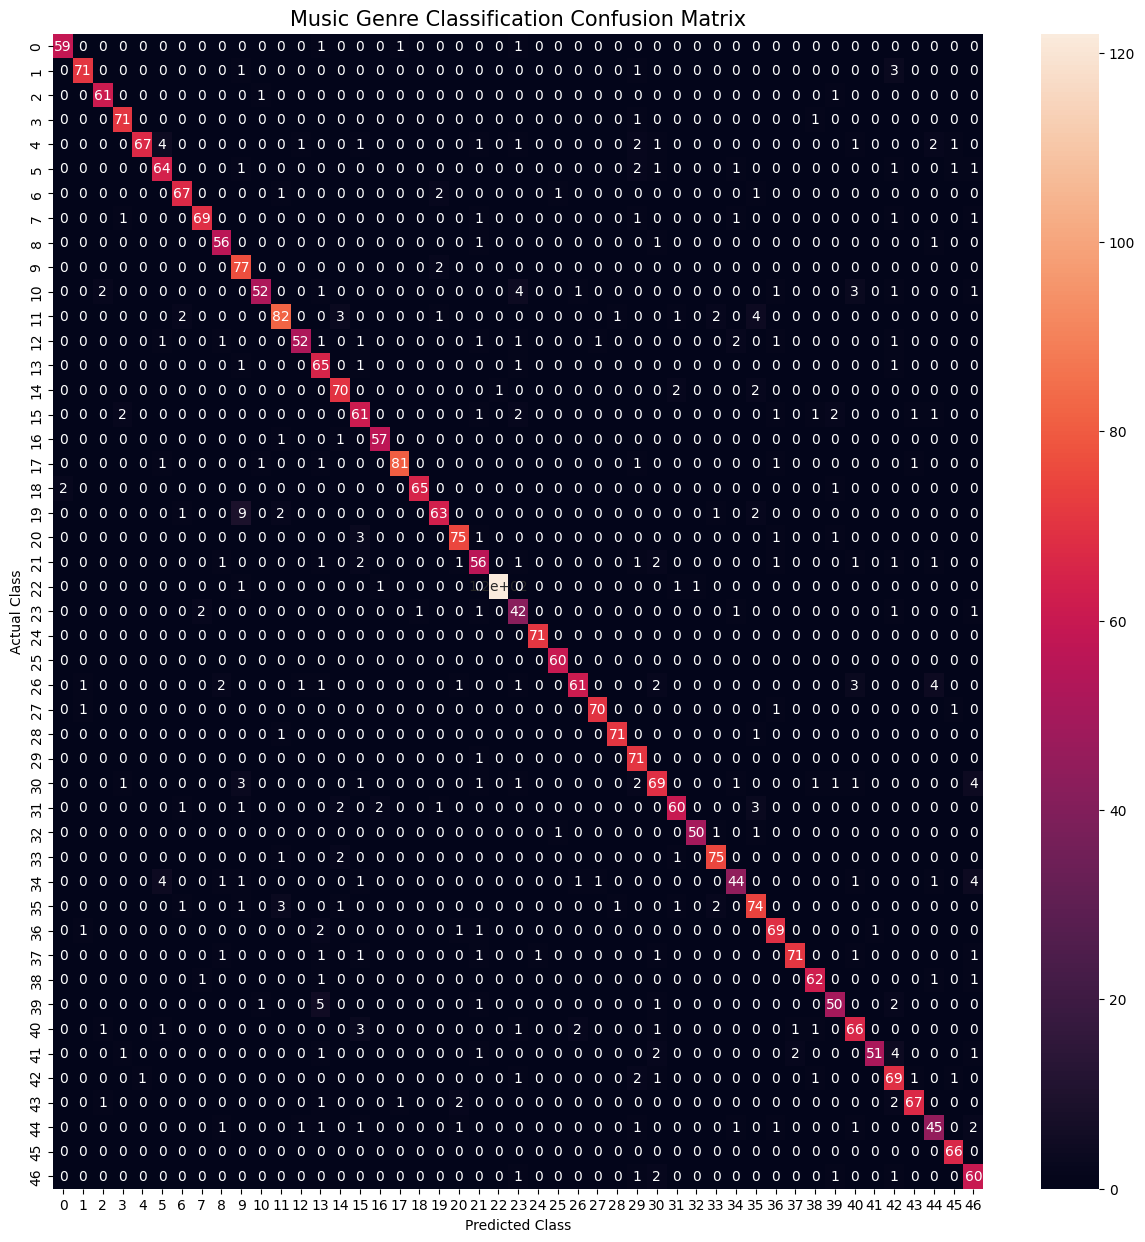

In [189]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Music Genre Classification Confusion Matrix",fontsize=15)
plt.show()